# Examen de Cinturón AML – Opción A

## Descripción del Examen
En este examen, trabajarás con un dataset reciente de complejidad baja, donde primero realizarás un análisis no supervisado utilizando **K-means** o **PCA**, y luego modelarás el conjunto de datos utilizando un **Perceptrón Multicapa (MLP)**. El objetivo es aplicar técnicas de clustering o reducción de dimensionalidad para analizar los datos, seguido de la implementación de un modelo MLP para realizar predicciones.

---

## Dataset
El dataset utilizado para este examen es el **Customer Personality Analysis** disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.  
**Enlace al dataset**: [Customer Personality Analysis en Kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)

---

## Instrucciones

### 1. Exploración y Preprocesamiento de Datos
- **Carga y exploración del dataset**:
  - Identifica las variables más relevantes. Las características incluyen información demográfica como edad, ingreso y estado civil, además de datos de comportamiento de compra como la cantidad gastada en diferentes productos.
- **Preprocesamiento**:
  - Maneja los valores nulos.
  - Normaliza los datos para el análisis posterior.

---

### 2. Análisis No Supervisado
- **Selecciona un enfoque**:  
  - **K-means**:
    - Determina el número óptimo de clusters utilizando el método del codo o el silhouette score.
    - Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.
  - **PCA**:
    - Realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada.
    - Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

---

### 3. Modelado con MLP
- **Implementación**:
  - Crea un **Perceptrón Multicapa (MLP)** para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.
  - Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que haya una proporción adecuada de cada clase.
- **Diseño del MLP**:
  - Discute la arquitectura del modelo, incluyendo:
    - Número de capas ocultas.
    - Número de neuronas en cada capa.
    - Funciones de activación utilizadas.

---

### 4. Evaluación del Modelo
- Evalúa el modelo utilizando métricas de clasificación:
  - **Precisión**, **Recall**, **F1-score** y **Matriz de confusión**.
  - Compara estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar posibles casos de sobreajuste.
- **Visualización**:
  - Genera curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

---

### 5. Discusión y Análisis
- **Reflexiona sobre los resultados**:
  - Insights obtenidos de los clusters o los componentes principales.
  - Relación de estos resultados con el comportamiento de los clientes.
- **Discute el rendimiento del modelo MLP**:
  - ¿Es adecuado para este tipo de datos?
  - ¿Cómo podrías mejorarlo?

---

### 6. Entrega Final
- **Informe detallado**:
  - Incluye todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones.
  - Asegúrate de que el informe sea:
    - Claro.
    - Estructurado.
    - Con visualizaciones que apoyen tu análisis.


In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("marketing_campaign.csv", sep='\t')

# Vista general del dataset
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## **Customer Personality Analysis - Dataset**

### **Attributes**

#### **People**
- **ID**: Customer's unique identifier.  
- **Year_Birth**: Customer's birth year.  
- **Education**: Customer's education level.  
- **Marital_Status**: Customer's marital status.  
- **Income**: Customer's yearly household income.  
- **Kidhome**: Number of children in customer's household.  
- **Teenhome**: Number of teenagers in customer's household.  
- **Dt_Customer**: Date of customer's enrollment with the company.  
- **Recency**: Number of days since customer's last purchase.  
- **Complain**: `1` if the customer complained in the last 2 years, `0` otherwise.  

---

#### **Products**
- **MntWines**: Amount spent on wine in the last 2 years.  
- **MntFruits**: Amount spent on fruits in the last 2 years.  
- **MntMeatProducts**: Amount spent on meat in the last 2 years.  
- **MntFishProducts**: Amount spent on fish in the last 2 years.  
- **MntSweetProducts**: Amount spent on sweets in the last 2 years.  
- **MntGoldProds**: Amount spent on gold in the last 2 years.  

---

#### **Promotion**
- **NumDealsPurchases**: Number of purchases made with a discount.  
- **AcceptedCmp1**: `1` if the customer accepted the offer in the 1st campaign, `0` otherwise.  
- **AcceptedCmp2**: `1` if the customer accepted the offer in the 2nd campaign, `0` otherwise.  
- **AcceptedCmp3**: `1` if the customer accepted the offer in the 3rd campaign, `0` otherwise.  
- **AcceptedCmp4**: `1` if the customer accepted the offer in the 4th campaign, `0` otherwise.  
- **AcceptedCmp5**: `1` if the customer accepted the offer in the 5th campaign, `0` otherwise.  
- **Response**: `1` if the customer accepted the offer in the last campaign, `0` otherwise.  

---

#### **Place**
- **NumWebPurchases**: Number of purchases made through the company’s website.  
- **NumCatalogPurchases**: Number of purchases made using a catalogue.  
- **NumStorePurchases**: Number of purchases made directly in stores.  
- **NumWebVisitsMonth**: Number of visits to the company’s website in the last month.  


In [3]:
# Ajuste de tipos de datos
df = df.astype({
    'ID': 'int64',  # Identificador único
    'Year_Birth': 'int64',  # Año de nacimiento
    'Education': 'category',  # Nivel educativo
    'Marital_Status': 'category',  # Estado civil
    'Income': 'float64',  # Ingreso anual
    'Kidhome': 'int64',  # Número de niños en el hogar
    'Teenhome': 'int64',  # Número de adolescentes en el hogar
    'Recency': 'int64',  # Días desde la última compra
    'MntWines': 'float64',  # Gasto en vino
    'MntFruits': 'float64',  # Gasto en frutas
    'MntMeatProducts': 'float64',  # Gasto en carne
    'MntFishProducts': 'float64',  # Gasto en pescado
    'MntSweetProducts': 'float64',  # Gasto en dulces
    'MntGoldProds': 'float64',  # Gasto en oro
    'NumDealsPurchases': 'int64',  # Compras con descuento
    'NumWebPurchases': 'int64',  # Compras en web
    'NumCatalogPurchases': 'int64',  # Compras por catálogo
    'NumStorePurchases': 'int64',  # Compras en tienda
    'NumWebVisitsMonth': 'int64'  # Visitas a la web en el último mes
})

# Conversión a booleanos
bool_columns = ['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df[bool_columns] = df[bool_columns].astype(bool)

# Ajuste adicional para fechas
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)  # Fecha de inscripción

# Verificación de los cambios
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

In [4]:
# Identificar valores nulos
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
#Voy a revisar las filas donde el Income es nulo
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5.0,...,7,False,False,False,False,False,False,3,11,False
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5.0,...,1,False,False,False,False,False,False,3,11,False
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81.0,...,2,False,False,False,False,False,False,3,11,False
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48.0,...,6,False,False,False,False,False,False,3,11,False
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11.0,...,6,False,False,False,False,False,False,3,11,False
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25.0,...,8,False,False,False,False,False,False,3,11,False
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230.0,...,9,False,False,False,False,False,False,3,11,False
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7.0,...,7,False,False,False,False,False,False,3,11,False
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445.0,...,1,False,False,False,False,False,False,3,11,False
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352.0,...,6,False,False,False,False,False,False,3,11,False


In [6]:
#Y revisar las filas donde el income anual es menor a 10000 para ver si los NaN podrian ser 0
df[df['Income'] < 10000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28.0,...,20,True,False,False,False,False,False,3,11,False
11,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6.0,...,8,False,False,False,False,False,False,3,11,False
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1.0,...,1,False,False,False,False,False,False,3,11,False
44,2139,1975,Master,Married,7500.0,1,0,2013-10-02,19,3.0,...,5,False,False,False,False,False,False,3,11,False
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3.0,...,9,False,False,False,False,False,False,3,11,True
136,5342,1976,Basic,Divorced,9548.0,1,0,2012-08-08,31,0.0,...,8,False,False,False,False,False,False,3,11,False
238,7297,1973,Graduation,Single,7500.0,1,0,2013-12-26,54,5.0,...,7,False,False,False,False,False,False,3,11,False
439,456,1986,2n Cycle,Married,7500.0,1,0,2013-02-07,96,1.0,...,8,False,False,False,False,False,False,3,11,False
724,4692,1976,Graduation,Married,7500.0,1,0,2012-08-01,19,7.0,...,9,True,False,False,False,False,False,3,11,True
774,4303,1957,PhD,Together,6835.0,0,1,2012-12-08,76,107.0,...,20,False,False,False,False,False,False,3,11,False


Prefiero eliminar las filas con los NaN, dado que no puedo cambiar con certeza por otro valor, y representan solo el 1% de las filas de nuestro dataset.

In [7]:
df.dropna(inplace=True)

Voy a revisar las columnas categoricas para decidir como codificarlas

In [8]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [9]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [10]:
# Create a mapping dictionary
mapping = {
    'Alone': 'Single',
    'Absurd': 'Single', 
    'YOLO': 'Single'
}

# Use replace method to map values
df['Marital_Status'] = df['Marital_Status'].replace(mapping)

C:\Users\Diego\AppData\Local\Temp\ipykernel_20144\3966965906.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Marital_Status'] = df['Marital_Status'].replace(mapping)


In [11]:
df['Marital_Status']

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2216, dtype: category
Categories (5, object): ['Divorced', 'Married', 'Single', 'Together', 'Widow']

Voy a codificar como one-hot encodding esas dos columnas categoricas y luego escalar el dataframe con standard scaler.

In [12]:
df = pd.get_dummies(df, drop_first=True)

En vez de la columna de fecha en la que se volvio cliente, voy a hacer una con los dias que lleva como cliente.

In [20]:
df['Days_Customer'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

df.drop('Dt_Customer', axis=1, inplace=True)

Y en vez de la columna Año de nacimiento, voy a modificar por la edad del cliente, asumiendo que los datos son del 2021, el año en el que se subio el dataset.

In [33]:
df['Age'] = 2021 - df['Year_Birth']

df.drop('Year_Birth', axis=1, inplace=True)

Voy a quitar la columna ID, que no deberia ser relevante para nuestras predicciones.

In [34]:
df.drop('ID', axis=1, inplace=True)

Antes de normalizar voy a separar mis conjuntos de entrenamiento y prueba, para evitar el data leakage

In [35]:
from sklearn.model_selection import train_test_split
target = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


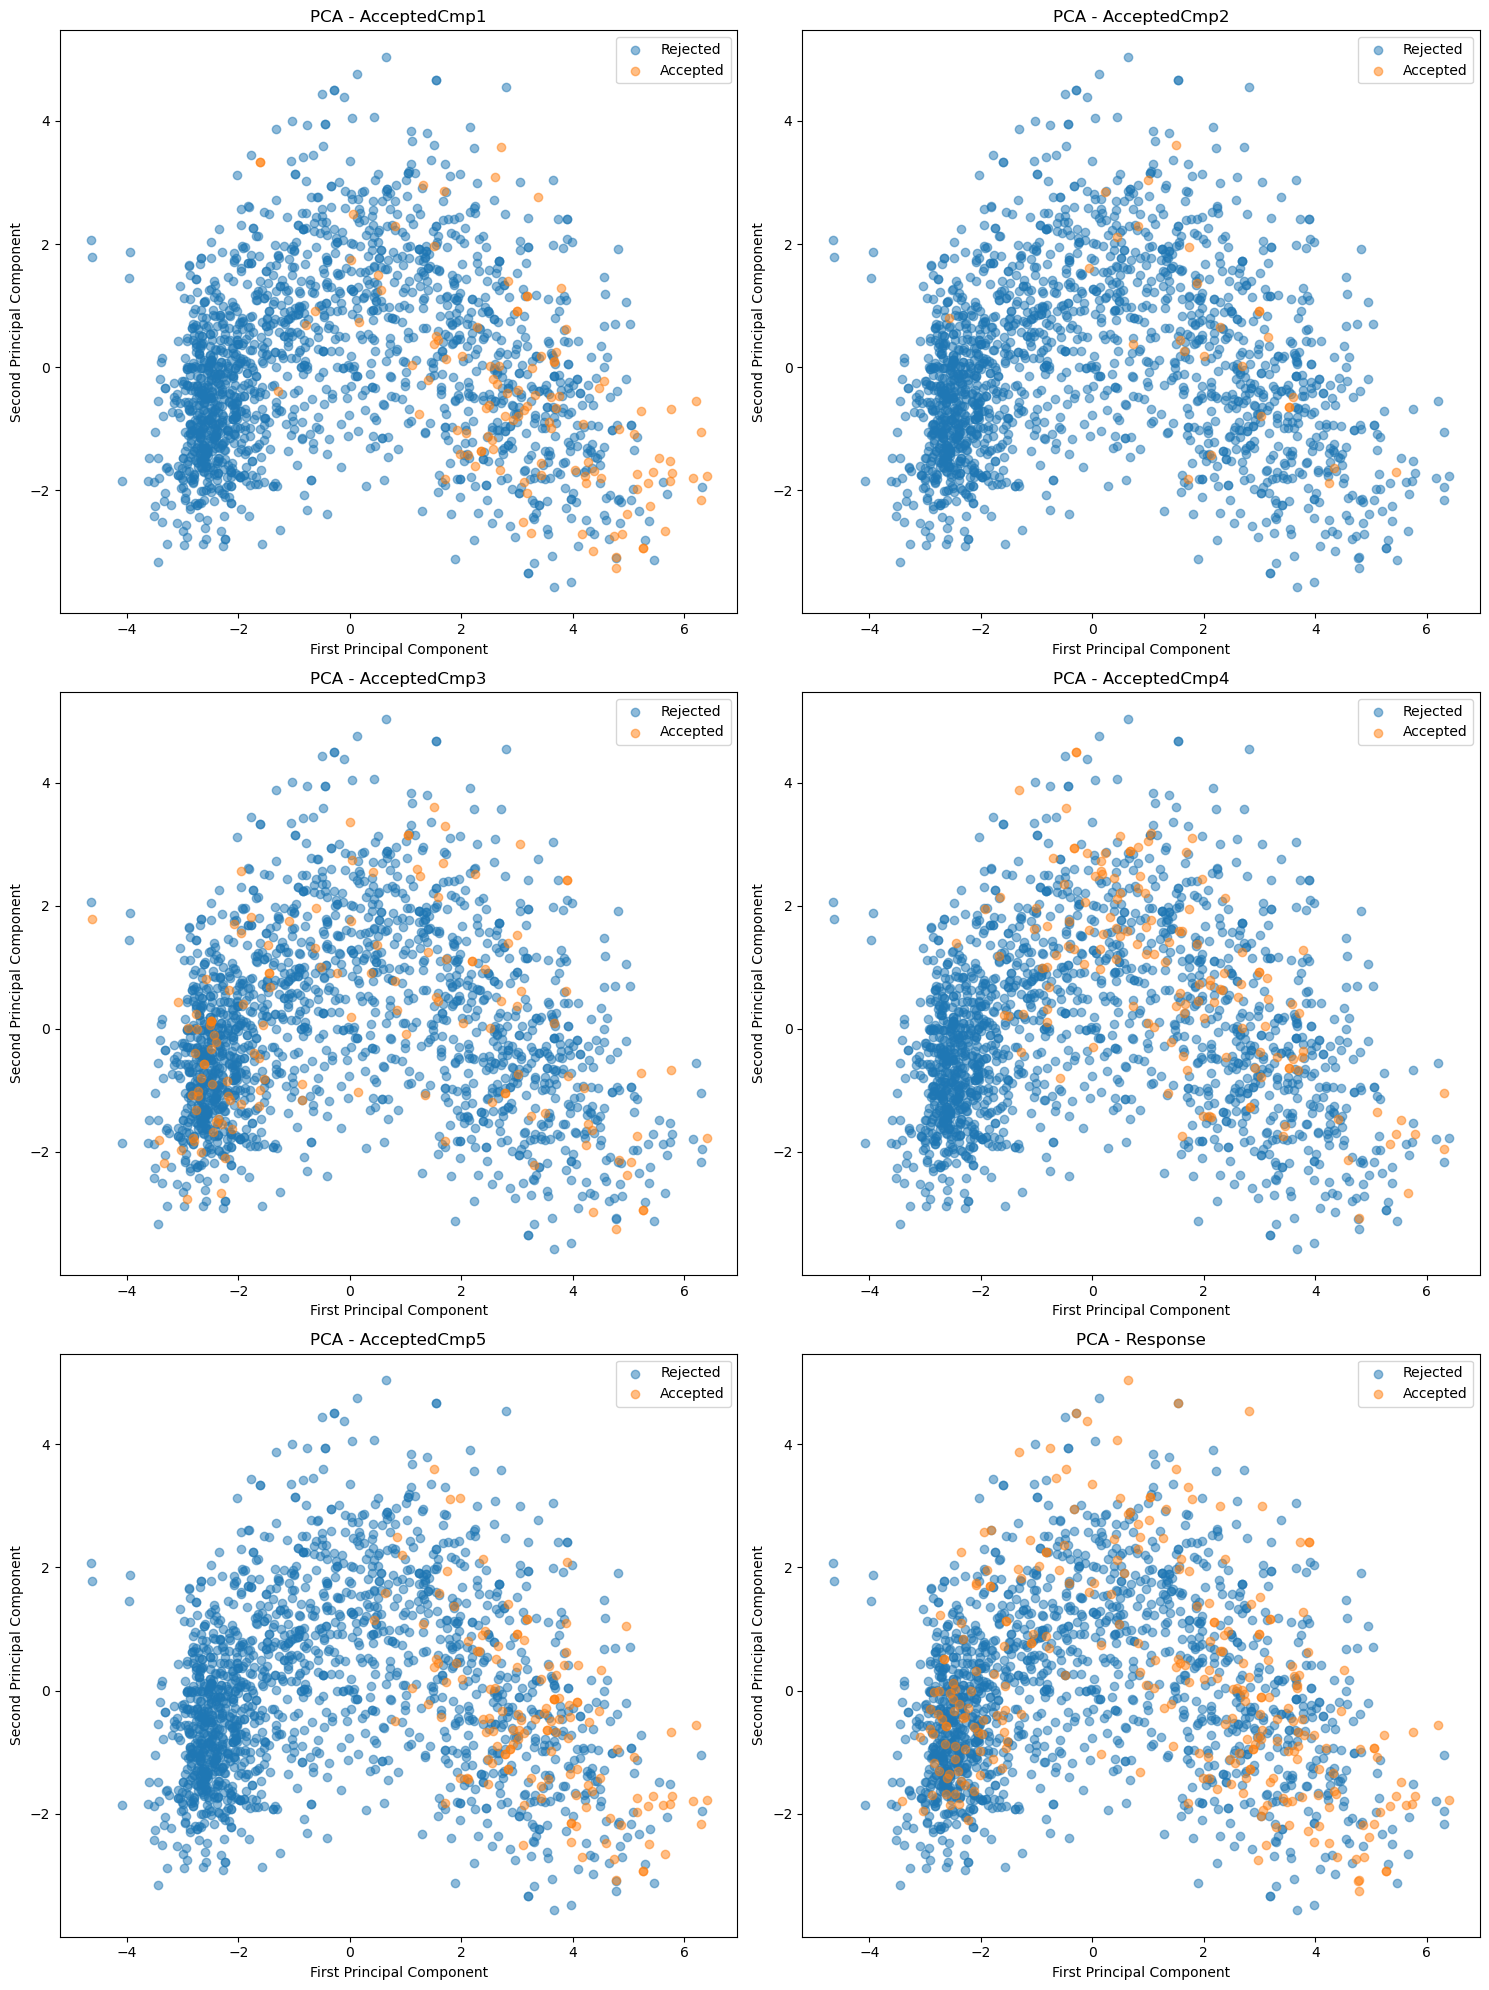

Explained variance ratio: PC1 = 0.234, PC2 = 0.085


In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train_scaled)

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.ravel()

# Plot each campaign
for idx, campaign in enumerate(target):
    # Get the target values for this campaign
    y_campaign = y_train[campaign].values
    
    # Plot points
    for target_val in [0, 1]:
        mask = y_campaign == target_val
        axes[idx].scatter(X_pca_train[mask, 0], 
                         X_pca_train[mask, 1],
                         alpha=0.5,
                         label=f'{"Accepted" if target_val else "Rejected"}')
    
    # Add labels and title
    axes[idx].set_xlabel('First Principal Component')
    axes[idx].set_ylabel('Second Principal Component')
    axes[idx].set_title(f'PCA - {campaign}')
    axes[idx].legend()


# Adjust layout
plt.tight_layout()
plt.show()

# Print explained variance
print(f"Explained variance ratio: PC1 = {pca.explained_variance_ratio_[0]:.3f}, PC2 = {pca.explained_variance_ratio_[1]:.3f}")

In [41]:
pca_full = PCA(n_components=0.9)  # Mantén el 90% de la varianza
X_pca_train = pca_full.fit_transform(X_train_scaled)
X_pca_test = pca_full.transform(X_test_scaled)
print(f"Número de componentes para explicar el 90% de la varianza: {pca_full.n_components_}")

Número de componentes para explicar el 90% de la varianza: 18


In [ ]:
from keras.models import Sequential
from keras.layers import Dense


# Create the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_pca_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(y_train.columns), activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_pca_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


c:\Users\Diego\anaconda3\envs\tf-cpu\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1499 - loss: 0.6319 - val_accuracy: 0.1437 - val_loss: 0.3634
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1540 - loss: 0.3102 - val_accuracy: 0.1803 - val_loss: 0.2450
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1771 - loss: 0.2396 - val_accuracy: 0.1521 - val_loss: 0.2234
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1452 - loss: 0.2076 - val_accuracy: 0.1662 - val_loss: 0.2163
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1433 - loss: 0.1856 - val_accuracy: 0.1549 - val_loss: 0.2121
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1457 - loss: 0.1801 - val_accuracy: 0.1606 - val_loss: 0.2102
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1546 - loss: 0.1748 - val_accuracy: 0.1634 - val_loss: 0.2095
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1659 - loss: 0.1705 - val_accuracy: 0.1718 - val_loss: 0.2087
Epo

In [51]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_pca_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
# Predict the labels for the test set
y_pred = model.predict(X_pca_test)
y_pred = (y_pred > 0.5).astype(int)

# Print classification report for each campaign
for i, campaign in enumerate(target):
    print(f"Classification Report for {campaign}:")
    print(classification_report(y_test[campaign], y_pred[:, i]))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1765 - loss: 0.1974 
Test Loss: 0.19569894671440125
Test Accuracy: 0.1644144207239151
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report for AcceptedCmp1:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       414
        True       0.39      0.30      0.34        30

    accuracy                           0.92       444
   macro avg       0.67      0.63      0.65       444
weighted avg       0.91      0.92      0.92       444

Classification Report for AcceptedCmp2:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       441
        True       0.00      0.00      0.00         3

    accuracy                           0.99       444
   macro avg       0.50      0.50      0.50       444
weighted avg       0.99      0.99      0.99       444

Classification Report for AcceptedCmp3:
              precision    recall  f1-score   s

c:\Users\Diego\anaconda3\envs\tf-cpu\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Diego\anaconda3\envs\tf-cpu\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Diego\anaconda3\envs\tf-cpu\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



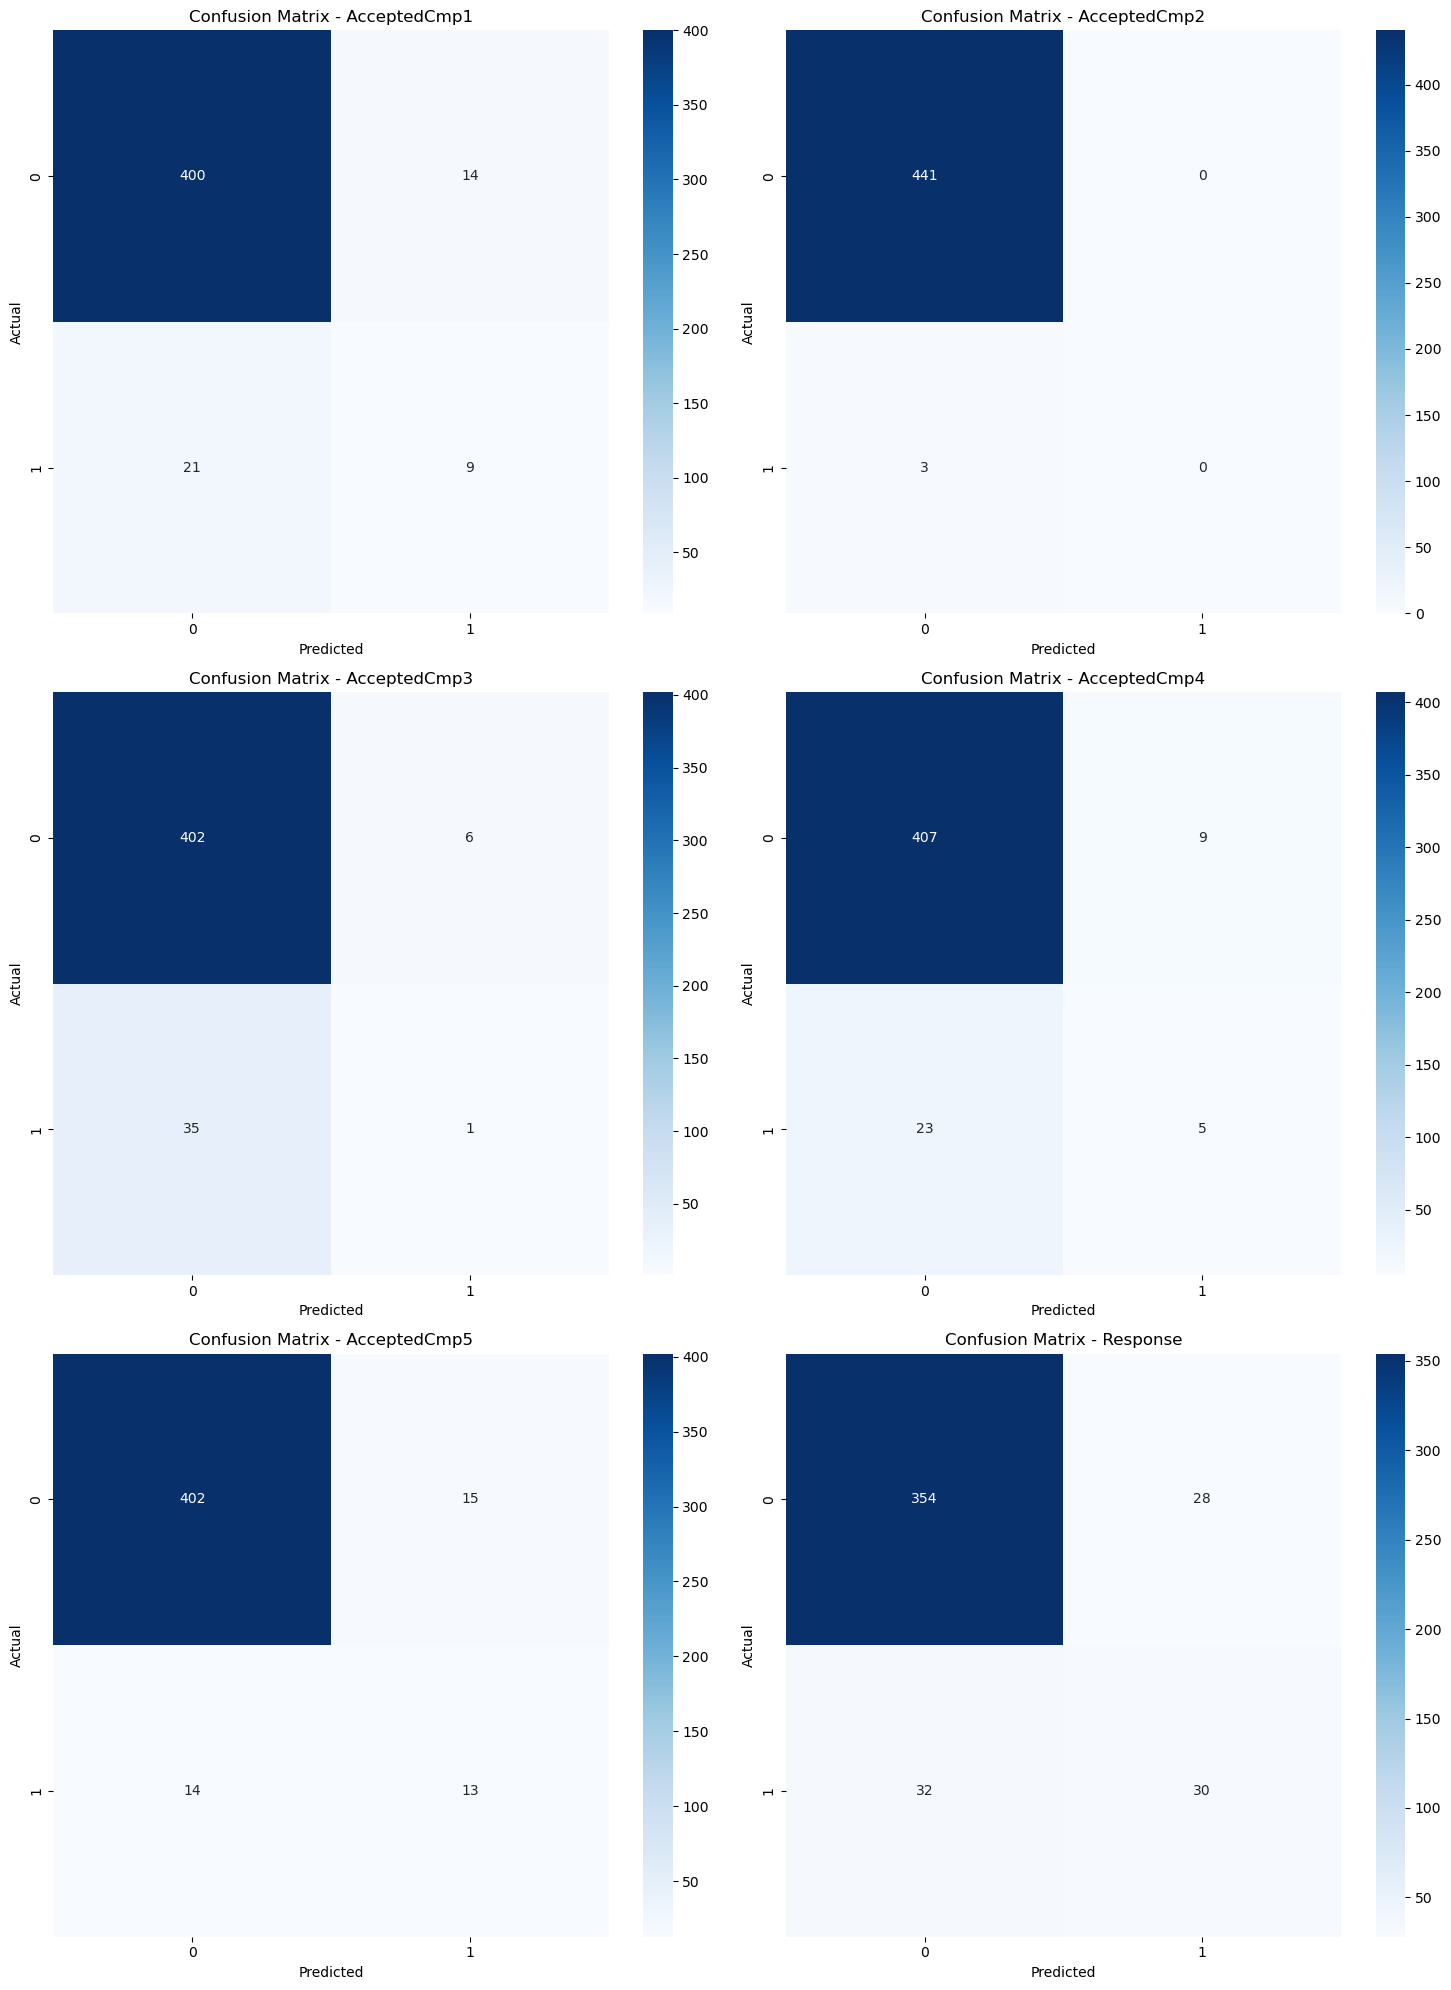

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrices for each campaign
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, campaign in enumerate(target):
    # Compute confusion matrix
    cm = confusion_matrix(y_test[campaign], y_pred[:, idx])
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'Confusion Matrix - {campaign}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()

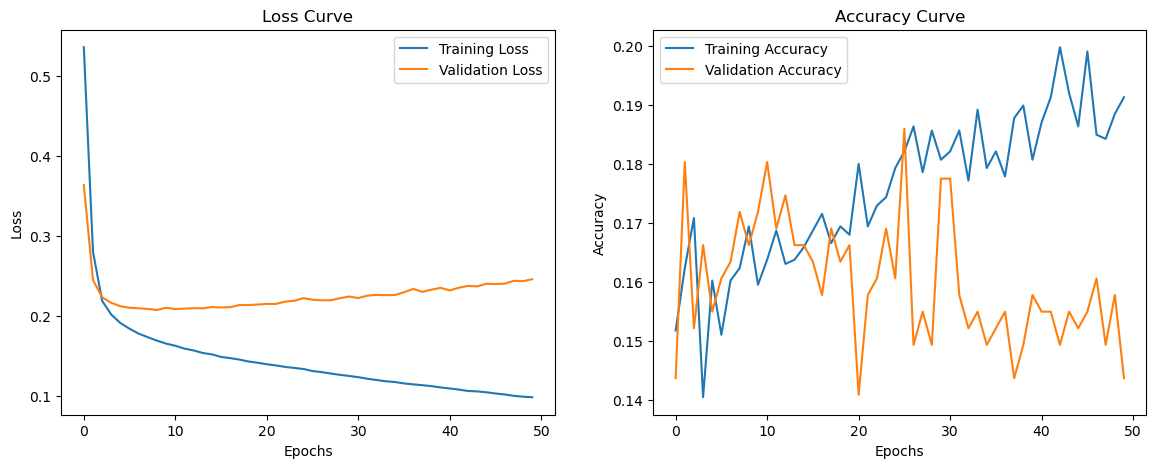

In [54]:
# Obtener los datos de pérdida y precisión del historial de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Curva de pérdida
ax1.plot(loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Loss Curve')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
# Curva de precisión
ax2.plot(accuracy, label='Training Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Accuracy Curve')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Mostrar las curvas
plt.show()